### **MA5204: Aprendizaje de Máquinas**

**Departamento de Ingeniería Matemática, Universidad de Chile**

**Profesor:** Felipe Tobar

**Ayudantes:** Alejandro Cuevas, Mauricio Araneda, Mauricio Romero

# Pytorch

En este notebook se muestran las estructuras básicas de pytorch, una implementación sencilla de red neuronal.


Más tutoriales de pytorch los pueden encontran en https://pytorch.org/tutorials/

Github: https://github.com/pytorch/pytorch

Características de pytorch:
* Permite trabajo en tensores, similares a numpy array pero permitiendo operaciones en la GPU.
* Diferenciación automática para construir y entrenar modelos, en particular redes neuronales.
* La gran diferencia con usar numpy es que Pytorch (al igual que tensorflow) construyen un grafo de computación, que luego es alimentado con los valores.

Una de las principales diferencias entre tensorflow y pytorch es que tensorflow genera grafos estaticos, que deben ser construidos por completo antes de evaluarlos, en cambio pytorch presenta grafos dinámicos, pueden ser modificados y evaluados por nodo.

Material complementario:

https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/


## Tensores

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [2]:
sns.set_context('notebook', font_scale=1.5)
sns.set_style('ticks')

In [4]:
# device = torch.device("cpu")
device = torch.device("cuda:0") # descomentar para correr en GPU

In [5]:
# tensor vacio
torch.empty(3, 4)

tensor([[1.0515e-26, 3.0715e-41, 3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00, 1.1578e+27, 1.1362e+30],
        [7.1547e+22, 4.5828e+30, 1.2121e+04, 7.1846e+22]])

In [6]:
x = torch.arange(0, 10)
x[4:6]

tensor([4, 5])

In [7]:
# tensor aleatorio
torch.rand(2, 2)

tensor([[0.2076, 0.2378],
        [0.9802, 0.7213]])

In [8]:
# tensor de 1 igual que numpy
x = torch.ones(5, 2)
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [9]:
# tipo de elemento
print(type(x))

# tamaño
print(x.shape)

# tipo de datos
print(x.dtype)

<class 'torch.Tensor'>
torch.Size([5, 2])
torch.float32


In [10]:
# por defecto pytorch usa floats de 32 bits
torch.get_default_dtype()

torch.float32

Tipos de dtype para los tensores

https://pytorch.org/docs/stable/tensors.html

In [11]:
# cambiamos tamaño por defecto
torch.set_default_dtype(torch.float64)
x = torch.empty(4, 2)

x.dtype

torch.float64

In [12]:
torch.get_default_dtype()

torch.float64

In [13]:
# tensor por defecto
torch.set_default_tensor_type(torch.FloatTensor)

In [14]:
torch.get_default_dtype()

torch.float32

A partir de un tensor, podemos crear uno que este lleno de $1$ pero que sea del mismo tipo `tensor.dtype` y esté en el mismo dispositivo `tensor.device`

In [15]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x.dtype)
x

torch.float64


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [16]:
y = torch.rand(5, 3)
print(y.dtype)
y

torch.float32


tensor([[0.9187, 0.2599, 0.3977],
        [0.3283, 0.3542, 0.9560],
        [0.3807, 0.3418, 0.3529],
        [0.4629, 0.6274, 0.9208],
        [0.8408, 0.2887, 0.5507]])

__Cuidado con sumar objetos de distintos tipo__

In [17]:
# y + x

In [18]:
# casteamos a float 32
x = x.type(torch.float32)

x + y

tensor([[1.9187, 1.2599, 1.3977],
        [1.3283, 1.3542, 1.9560],
        [1.3807, 1.3418, 1.3529],
        [1.4629, 1.6274, 1.9208],
        [1.8408, 1.2887, 1.5507]])

In [19]:
# tambien podemos sumar en pytorch
torch.add(x, y)

tensor([[1.9187, 1.2599, 1.3977],
        [1.3283, 1.3542, 1.9560],
        [1.3807, 1.3418, 1.3529],
        [1.4629, 1.6274, 1.9208],
        [1.8408, 1.2887, 1.5507]])

In [20]:
# podemos crear un contenedor para recibir el resultado
result = torch.empty(5, 3)
torch.add(x, y, out=result)
result

tensor([[1.9187, 1.2599, 1.3977],
        [1.3283, 1.3542, 1.9560],
        [1.3807, 1.3418, 1.3529],
        [1.4629, 1.6274, 1.9208],
        [1.8408, 1.2887, 1.5507]])

In [21]:
# no modificamos ni x ni y
y.add(x)

tensor([[1.9187, 1.2599, 1.3977],
        [1.3283, 1.3542, 1.9560],
        [1.3807, 1.3418, 1.3529],
        [1.4629, 1.6274, 1.9208],
        [1.8408, 1.2887, 1.5507]])

In [22]:
y

tensor([[0.9187, 0.2599, 0.3977],
        [0.3283, 0.3542, 0.9560],
        [0.3807, 0.3418, 0.3529],
        [0.4629, 0.6274, 0.9208],
        [0.8408, 0.2887, 0.5507]])

In [23]:
# Si ponemos un '_' al final de la operación, esta es 'in place' y modifica el tensor
y.add_(x)

tensor([[1.9187, 1.2599, 1.3977],
        [1.3283, 1.3542, 1.9560],
        [1.3807, 1.3418, 1.3529],
        [1.4629, 1.6274, 1.9208],
        [1.8408, 1.2887, 1.5507]])

In [24]:
y

tensor([[1.9187, 1.2599, 1.3977],
        [1.3283, 1.3542, 1.9560],
        [1.3807, 1.3418, 1.3529],
        [1.4629, 1.6274, 1.9208],
        [1.8408, 1.2887, 1.5507]])

## De Torch a Numpy

El tensor de Torch y el Numpy array comparten los mismos espacios de memoria, es decir, al cambiar uno cambia el otro.

In [25]:
y_np = y.numpy()
print(type(y_np))
y_np

<class 'numpy.ndarray'>


array([[1.9187231, 1.2599092, 1.3977351],
       [1.3282869, 1.354249 , 1.9560323],
       [1.3807368, 1.3418349, 1.352916 ],
       [1.4628685, 1.6273791, 1.9207697],
       [1.8407838, 1.2887084, 1.5506918]], dtype=float32)

In [26]:
y.add_(1)

print(y)
print(y_np)

tensor([[2.9187, 2.2599, 2.3977],
        [2.3283, 2.3542, 2.9560],
        [2.3807, 2.3418, 2.3529],
        [2.4629, 2.6274, 2.9208],
        [2.8408, 2.2887, 2.5507]])
[[2.918723  2.2599092 2.397735 ]
 [2.328287  2.354249  2.9560323]
 [2.3807368 2.341835  2.352916 ]
 [2.4628685 2.627379  2.9207697]
 [2.8407838 2.2887084 2.5506918]]


## De Numpy a Torch

In [27]:
a = np.ones(5)
b = torch.from_numpy(a)

np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Matrices, vectores

In [28]:
# producto punto
# vector X vector

vec1 = torch.rand(5)
vec2 = torch.ones(5)

torch.dot(vec1, vec2)

tensor(3.5243)

In [29]:
# matriz X matriz

mat1 = torch.rand(5, 4)
mat2 = torch.ones(4, 5)

torch.mm(mat1, mat2)

tensor([[2.8287, 2.8287, 2.8287, 2.8287, 2.8287],
        [1.3680, 1.3680, 1.3680, 1.3680, 1.3680],
        [2.5739, 2.5739, 2.5739, 2.5739, 2.5739],
        [2.2350, 2.2350, 2.2350, 2.2350, 2.2350],
        [2.5323, 2.5323, 2.5323, 2.5323, 2.5323]])

**Cuidado con las operaciones**

In [30]:
# torch.dot(mat1, mat2)

In [31]:
# Matriz X vector

mat = torch.randn(3, 5)
vec = torch.randn(5)

torch.mv(mat, vec)

tensor([-4.9611, -1.3171, -1.5453])

In [32]:
# Matriz + Matrix z vector

M = torch.randn(3)
mat = torch.randn(3, 5)
vec = torch.randn(5)
torch.addmv(M, mat, vec)

tensor([-1.8438,  1.1380,  0.2087])

In [33]:
# producto externo

vec1 = torch.arange(1, 4)
vec2 = torch.arange(1, 3)

torch.ger(vec1, vec2)

tensor([[1, 2],
        [2, 4],
        [3, 6]])

## Broadcasting

Dos tensores $X, Y$ son "broadcasteable" si se cumplen las siguientes reglas:

* Cada tensor tiene al menos 1 dimension.
* Cuando se itera sobre las dimensiones, empezando desde la ultima, las dimensiones deben ser o iguales, o alguna de ellas debe ser 1, o una de ellas no existe.


En caso de ser así, el tamaño final es de la forma:

* Si el numero de dimensiones entre $X$ e $Y$ no son iguales, se agrega $1$ a las dimensiones del tensor con menos dimensiones para hacerlas de igual largo.

* Luego, para cada dimension, el tamaño de dicha dimension es el máximo de los tamaños de $X$ e $Y$ en dicha dimension.



In [34]:
x = torch.empty(5, 7, 3)
y = torch.empty(5, 7, 3)
# tensores del mismo tamaño son siempre broadcastable

In [35]:
x = torch.empty(5, 3, 4, 1)
y = torch.empty(   3, 1, 1)
# x e y son broadcastable.
# 1st trailing dimension: ambas tienen tamaño 1
# 2nd trailing dimension: y tiene tamaño 1
# 3rd trailing dimension: tamaño x == tamaño y 
# 4th trailing dimension: dimension de y no existe

In [36]:
x = torch.empty(5, 2, 4, 1)
y = torch.empty(   3, 1, 1)
# x e y no son broadcastable, porque en la 3rd trailing dimension 2 != 3

In [37]:
x = torch.ones(5, 1)
y = torch.arange(5, dtype=torch.float32)

x - y

tensor([[ 1.,  0., -1., -2., -3.],
        [ 1.,  0., -1., -2., -3.],
        [ 1.,  0., -1., -2., -3.],
        [ 1.,  0., -1., -2., -3.],
        [ 1.,  0., -1., -2., -3.]])

## Autograd

El package the `Autograd` permite diferenciación automática para todas las operaciones con tensores. Especialmente util al realizar _Backpropagation_ en las redes neuronales.

Para activarlo, al crear un tensor se debe fijar el atributo `.requires_grad` como `True` guarda todas las operaciones en dicho tensor, cuando terminas de realizar calculos (Por ejemplo aplicar capas de una red) se puede llamar a `.backward()` y tener todos los gradientes calculados automáticamente. Donde el gradiente del tensor queda acumulado en el atributo `.grad`

In [38]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

operemos sobre $x$ y veamos si guardas las operaciones

In [39]:
# operamos sobre el tensor
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [40]:
y.requires_grad

True

In [41]:
y.grad_fn

Sigamos operando sobre $y$.

In [42]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward1>)


Podemos cambiar la _flag_ de gradiente, que por defecto es `False`

In [43]:
# creamos tensor
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
# muestra si require gradiente
print(a.requires_grad)

# cambiar el flag
a.requires_grad_(True)

print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### Gradientes

In [44]:
# calculamos el gradiente
out.backward()

Mostramos el gradiente evaluado en x

$$\frac{d (out)}{dx} |_{x=X}$$

Como out es una función escalar, el gradiente va a ser una matriz de $2 \times 2$

In [45]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

Si tenemos una función $f(x) \in \mathbb{R}^m$ y un input $x \in \mathbb{R}^p$, luego el gradiente de $f$ respecto a $x$ es una matriz Jacobiana de $p \times m$.

¿Pero que pasa al evaluarla en pytorch con nuestro tensor?

In [46]:
x = torch.randn(3, requires_grad=True)

y = x * 2
# sacamos cuadrado hasta cierto límite
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-457.0511, -270.5641, 1201.1113], grad_fn=<MulBackward0>)


Como ahora nuestro output es un vector, __no__ podemos obtener el Jacobiano directamente 

In [47]:
# y.backward()
# x.grad()

Autograd fue construido para poder computar un porducto vector-jacobiano, es decir, dado una matriz Jacobiana $J=\frac{d y}{d x}$ y un vector cualquiera $v$ computa el producto $v^T \cdot J$.

Si $v$ es el gradiente de una función escalar $v = \frac{d (g)}{d y}$ entonces podemos escribir el producto vector-jacobiano por la regla de la cadena.

$$ J^T \cdot v = \frac{d g}{dx}$$

In [48]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


# Redes Neuronales

Para definir una red en pytorch en general se siguen los siguentes pasos.

* Definir la red que tenga parametros entrenables (pesos)
* Iterar sobre el dataset de inputs
* Procesas el input a traves de la red
* Calcular la función de perdida (loss)
* Propagar los gradientes hacia los parametros de la red
* Actualizar los pesos de la red siguiendo una regla, en general se usa gradiente decendiente.

$$ w_{i+1} = w_i - \alpha \nabla_x \mathcal{L}$$

### Importemos datos

In [49]:
torch.set_default_dtype(torch.float32)

In [50]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.keys())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33, random_state=42)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [51]:
from torch.utils.data import Dataset, DataLoader

class wisconsin(Dataset):
    """
    Breast cancer wisconsin dataset
    Recive el numpy array con los atributos
    y targeres
    """
    def __init__(self, X, y):
        self.data = torch.from_numpy(X).type(torch.float32)
        self.target = torch.from_numpy(y).long()
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        """
        Entrega un elemento del dataset
        """
        features = self.data[idx, :]
        target = self.target[idx]
        
        return features, target

# crear dataset
trainset = wisconsin(X_train, y_train)
# convertir test set
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).long()

In [52]:
# cargador de datos
trainloader = DataLoader(trainset,
                         batch_size=20,
                         shuffle=True,
                         num_workers=2)

### Creemos la red

In [53]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [54]:
class NNet(nn.Module):
    """
    Red Neuronal
    """
    def __init__(self):
        super(NNet, self).__init__()
        
        # definicion de capas
        self.fc1 = nn.Linear(30, 600)
        self.sig1 = nn.Sigmoid()
        self.fc2 = nn.Linear(600, 2)
        self.out = nn.Sigmoid()
        
    def forward(self, x):
        """
        Funcion que se aplica a los datos, 
        es decir funcion que aplica la red
        """
        y = self.fc1(x)
        y = self.sig1(y)
        y = self.fc2(y)
        y = self.out(y)

        return y

In [55]:
model = NNet()
print(model)

criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=0.0001)

NNet(
  (fc1): Linear(in_features=30, out_features=600, bias=True)
  (sig1): Sigmoid()
  (fc2): Linear(in_features=600, out_features=2, bias=True)
  (out): Sigmoid()
)


In [56]:
params = list(model.parameters())
print(len(params))
print(params[0].size())

4
torch.Size([600, 30])


Probemos con un dato generado al azar

In [57]:
x = torch.rand(1, 1, 30)
out = model(x)
out

tensor([[[0.5118, 0.5334]]], grad_fn=<SigmoidBackward>)

In [58]:
n_epochs = 20

losses = []
model.train()  # se indica que el modelo a entrenar esta en modo train.
               # regularizaciones como dropout tienen distintos comportamiento en train y eval.
for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # recibir inputs
        inputs, labels = data

        # setear gradientes a 0
        opt.zero_grad()

        # forward
        outputs = model(inputs)
        # obtener loss
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimizar
        opt.step()

        # mostrar la loss
        running_loss += loss.item()
        
        if i % 30 == 29:    # mostrar cada 19 mini batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0
        # guardar loss
        losses.append(loss.data.numpy())
    torch.save(model.state_dict(), "model.pth")  # se pueden guardar los pesos de los modelos que instanciamos

print('Finished Training')

Finished Training


Text(0.5, 1.0, 'Perdida en función de las Épocas')

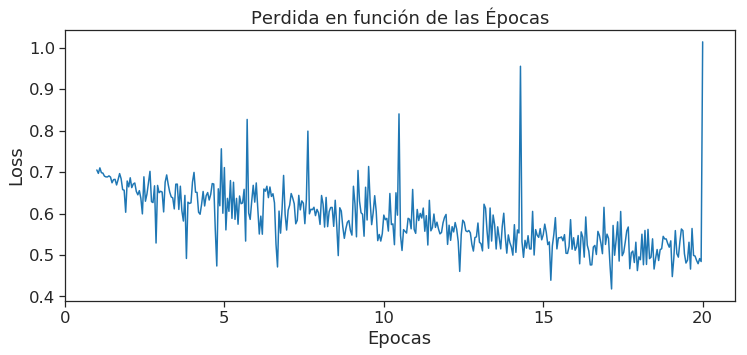

In [59]:
plt.figure(figsize=(12, 5))
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.plot(np.linspace(1, n_epochs, len(losses)), losses)
plt.xticks(np.arange(0, n_epochs + 1, 5));
plt.xlim(0, n_epochs + 1)
plt.title('Perdida en función de las Épocas')

#### Evaluemos nuestro modelo

__Accuracy en test set__ 

#### Cargamos el ultimo modelo
Hay que tener en cuenta que se necesita una instancia de nuestra clase modelo que tenga la misma arquitectura que de la cual guardamos los pesos, de lo contrario no se podrá cargar.

In [60]:
# carga de los pesos
model.load_state_dict(torch.load("model.pth")) 

model.eval()  # se indica que el modelo se usara para evaluar
with torch.no_grad():  # no se calculan gradientes
    y_pred = model(X_test).detach().numpy()

y_pred = y_pred.argmax(1)

(1 - np.abs(y_test.numpy() - y_pred)).sum() / len(y_test)

0.9361702127659575